# Data Collecting and Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
for i in df.select_dtypes(exclude='number').columns.to_list():
    print(f'kolom {i}:\n{df[i].value_counts()}')
    print('==========')

kolom airline:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
kolom flight:
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64
kolom source_city:
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
kolom departure_time:
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
kolom stops:
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64
kolom arrival_time:
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_N

In [6]:
df.select_dtypes(exclude='number').columns.to_list()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [7]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Preprpcessing

In [9]:
df =  df.drop_duplicates()

In [10]:
df = df.drop(columns=['Unnamed: 0', "flight"])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df = pd.get_dummies(df, columns=['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class'], drop_first=True)
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [12]:
df2 = df.copy()

In [13]:
def outlier_remover(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [14]:
for i in df2.columns.tolist():
    df2 = outlier_remover(df2, i)

print(f"Sebelum penghapusan outlier {df.shape} setelah {df2.shape}")

Sebelum penghapusan outlier (300153, 31) setelah (28274, 31)


<AxesSubplot:xlabel='price', ylabel='Count'>

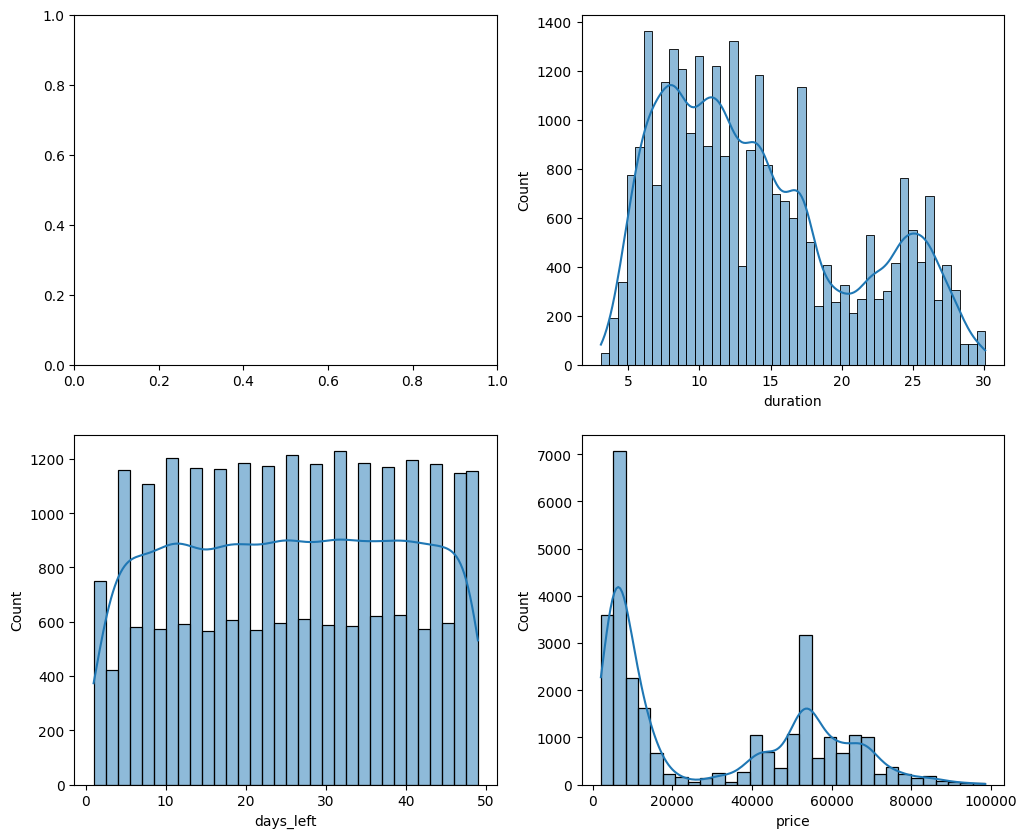

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.histplot(x='duration', data=df2, ax=ax[0,1], kde=True)
sns.histplot(x='days_left', data=df2, ax=ax[1,0], kde=True)
sns.histplot(x='price', data=df2, ax=ax[1,1], kde=True)

<AxesSubplot:ylabel='price'>

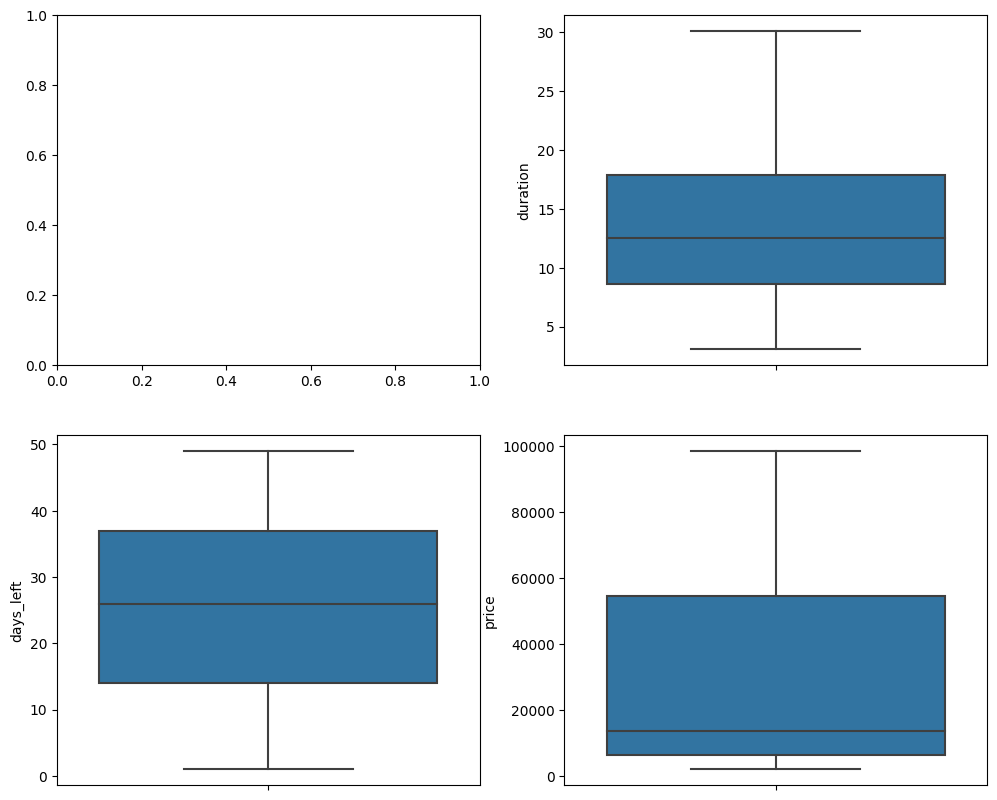

In [16]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.boxplot(y='duration', data=df2, ax=ax[0,1])
sns.boxplot(y='days_left', data=df2, ax=ax[1,0])
sns.boxplot(y='price', data=df2, ax=ax[1,1])

In [17]:
x = df2.drop(columns=['price'])
y = df2['price']

In [18]:
df_nscal = x.copy()
df_mm = x.copy()
df_ss = x.copy()
df_rb = x.copy()

In [19]:
df_ss.describe()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
count,28274.000000,28274.000000,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.000000,28274.000000
mean,14.027106,25.573849,0.385619,0.0,0.0,0.0,0.576820,0.0,0.0,0.0,0.378581,0.330268,0.0,0.363762,0.0,0.450838,0.0,0.0,0.0,0.0,0.272476,0.0,0.234314,0.386539,0.0,0.450909,0.0,0.0,0.275730,0.551850
std,6.634948,13.817610,0.486750,0.0,0.0,0.0,0.494072,0.0,0.0,0.0,0.485042,0.470318,0.0,0.481090,0.0,0.497586,0.0,0.0,0.0,0.0,0.445242,0.0,0.423577,0.486965,0.0,0.497593,0.0,0.0,0.446889,0.497313
min,3.080000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,8.580000,14.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,12.500000,26.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,17.830000,37.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000
max,30.080000,49.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [20]:
mm = MinMaxScaler()
ss = StandardScaler()
rb = RobustScaler()
numeric_cols = ['duration'	,'days_left']
cat_cols = [col for col in df2.columns if col not in numeric_cols]
df_mm = pd.DataFrame(mm.fit_transform(x), columns=x.columns)
df_ss = pd.DataFrame(ss.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_ss = pd.concat([df_ss, df2[cat_cols].reset_index(drop=True)], axis=1)
df_rb = pd.DataFrame(rb.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_rb = pd.concat([df_rb, df2[cat_cols].reset_index(drop=True)], axis=1)

In [21]:
df_mm.describe()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
count,28274.000000,28274.000000,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.000000,28274.000000
mean,0.405448,0.511955,0.385619,0.0,0.0,0.0,0.576820,0.0,0.0,0.0,0.378581,0.330268,0.0,0.363762,0.0,0.450838,0.0,0.0,0.0,0.0,0.272476,0.0,0.234314,0.386539,0.0,0.450909,0.0,0.0,0.275730,0.551850
std,0.245739,0.287867,0.486750,0.0,0.0,0.0,0.494072,0.0,0.0,0.0,0.485042,0.470318,0.0,0.481090,0.0,0.497586,0.0,0.0,0.0,0.0,0.445242,0.0,0.423577,0.486965,0.0,0.497593,0.0,0.0,0.446889,0.497313
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.203704,0.270833,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,0.348889,0.520833,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.546296,0.750000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [22]:
df_ss.describe()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
count,2.827400e+04,2.827400e+04,28274.000000,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.000000,28274.000000
mean,1.527941e-16,-2.412538e-17,29733.519453,0.385619,0.0,0.0,0.0,0.576820,0.0,0.0,0.0,0.378581,0.330268,0.0,0.363762,0.0,0.450838,0.0,0.0,0.0,0.0,0.272476,0.0,0.234314,0.386539,0.0,0.450909,0.0,0.0,0.275730,0.551850
std,1.000018e+00,1.000018e+00,25761.148193,0.486750,0.0,0.0,0.0,0.494072,0.0,0.0,0.0,0.485042,0.470318,0.0,0.481090,0.0,0.497586,0.0,0.0,0.0,0.0,0.445242,0.0,0.423577,0.486965,0.0,0.497593,0.0,0.0,0.446889,0.497313
min,-1.649945e+00,-1.778476e+00,2074.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,-8.209865e-01,-8.376307e-01,6450.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,-2.301651e-01,3.084171e-02,13579.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,5.731712e-01,8.269414e-01,54608.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000
max,2.419488e+00,1.695414e+00,98543.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [23]:
df_rb.describe()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
count,28274.000000,28274.000000,28274.000000,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.0,28274.0,28274.000000,28274.0,28274.000000,28274.000000,28274.0,28274.000000,28274.0,28274.0,28274.000000,28274.000000
mean,0.165093,-0.018528,29733.519453,0.385619,0.0,0.0,0.0,0.576820,0.0,0.0,0.0,0.378581,0.330268,0.0,0.363762,0.0,0.450838,0.0,0.0,0.0,0.0,0.272476,0.0,0.234314,0.386539,0.0,0.450909,0.0,0.0,0.275730,0.551850
std,0.717292,0.600766,25761.148193,0.486750,0.0,0.0,0.0,0.494072,0.0,0.0,0.0,0.485042,0.470318,0.0,0.481090,0.0,0.497586,0.0,0.0,0.0,0.0,0.445242,0.0,0.423577,0.486965,0.0,0.497593,0.0,0.0,0.446889,0.497313
min,-1.018378,-1.086957,2074.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,-0.423784,-0.521739,6450.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,13579.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.576216,0.478261,54608.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000
max,1.900541,1.000000,98543.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


# Modelling

In [24]:
df_nscal.shape

(28274, 30)

In [25]:
df_mm.shape

(28274, 30)

In [26]:
df_ss.drop(columns=['price'], inplace=True)
df_rb.drop(columns=['price'], inplace=True)

In [27]:
df_ss.shape

(28274, 30)

In [28]:
df_rb.shape

(28274, 30)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_nscal, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores = pd.DataFrame.from_dict(model_scores, orient='index').transpose()

In [ ]:
df_scores = df_scores.applymap(lambda x: abs(x))
df_scores

In [ ]:
df_scores.to_csv('model_scores.csv', index=False)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_mm = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_mm, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_mm[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_mm.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores2 = pd.DataFrame.from_dict(model_scores_mm , orient='index').transpose()
df_scores2

In [ ]:
abs(df_scores2)

In [ ]:
df_scores2.to_csv('model_scores_mm.csv', index=False)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_ss = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_ss, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_ss[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_ss.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores3 = pd.DataFrame.from_dict(model_scores_ss , orient='index').transpose()
df_scores3

In [ ]:
abs(df_scores3)

In [ ]:
df_scores3.to_csv('model_scores_ss.csv', index=False)

In [41]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_rb = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=df_rb, y=y, cv=25, scoring='neg_mean_squared_error')
    model_scores_rb[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_rb.items():
    print(f"{model}: {scores}")

Regresi = [-4.26477994e+07 -1.44933740e+07 -1.99588598e+07 -2.26798014e+07
 -2.22604324e+07 -1.47899235e+07 -1.54768285e+07 -1.85419199e+07
 -3.80293339e+07 -1.32855576e+07 -2.13366266e+07 -2.12643212e+07
 -2.50867034e+07 -5.50547401e+07 -1.92059340e+08 -1.38569141e+08
 -1.18756454e+08 -1.11069919e+08 -6.67256700e+07 -8.71620552e+07
 -9.30769952e+07 -1.57000095e+08 -1.34549356e+08 -9.91187984e+07
 -6.69134979e+07]
KNN = [-6.59339719e+07 -4.35807307e+06 -2.78231943e+07 -3.39872658e+06
 -3.06472503e+07 -3.62137375e+06 -8.81060833e+07 -3.43302130e+06
 -4.16091562e+07 -8.57663893e+06 -2.31788286e+07 -4.64975215e+06
 -4.96248180e+07 -1.04511716e+08 -5.98533872e+07 -9.15276257e+07
 -5.62524361e+07 -8.17936603e+07 -2.34673656e+07 -1.65178563e+08
 -4.26571977e+08 -3.65501347e+08 -1.51161276e+08 -1.19773589e+08
 -4.93341309e+08]
SVM = [-4.08665817e+07 -9.34887012e+07 -4.88447043e+07 -7.84924435e+07
 -4.41828731e+07 -1.07798881e+08 -5.02954338e+07 -7.93414139e+07
 -3.59419844e+07 -7.56873164e+07

In [42]:
df_scores4 = abs(pd.DataFrame.from_dict(model_scores_rb , orient='index').transpose())
df_scores4.to_csv('model_scores_rb.csv', index=False)